<a href="https://colab.research.google.com/github/AndresInsuasty/tesis-cafes-especiales/blob/main/utils/Corte_NDVI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Código para corte de imágenes NDVI**

Imágenes RGB de mapas NDVI almacenadas en Drive, las imágenes resultantes son almacenadas en el directorio de Drive asignado.

Importa librerías requeridas

In [ ]:
import os
import glob

from skimage import io
import cv2

import matplotlib.pyplot as plt
import numpy as np

import random

Obtiene información del conjunto de imágenes

In [ ]:
# Ruta del directorio que contiene las imágenes de los mapas NDVI
directory_image = '/content/drive/MyDrive/monitoria/NDVI/Mapas NDVI'

files = glob.glob(os.path.join(directory_image, "*.jpg"))
total_image = len(files)
sample = io.imread(files[2])

print("Total images:", total_image)
print("Sample shape:", sample.shape)
print(f"Value range: [{np.min(sample)},{np.max(sample)}]")

Total images: 8
Sample shape: (3894, 3497, 3)
Value range: [0,255]


Grafica las imágenes de los mapas NVDI

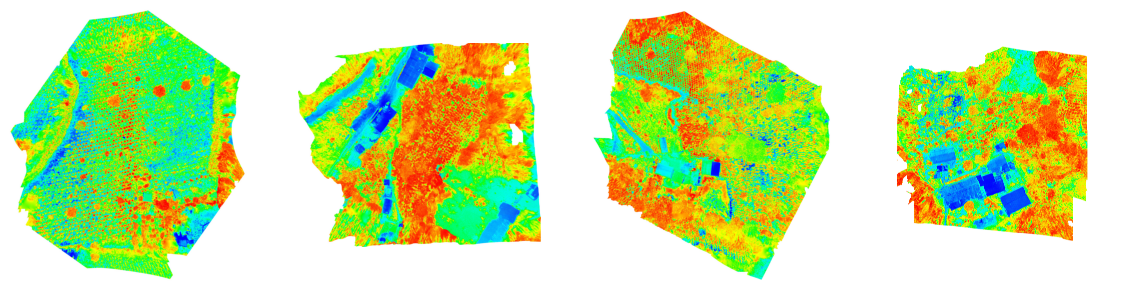

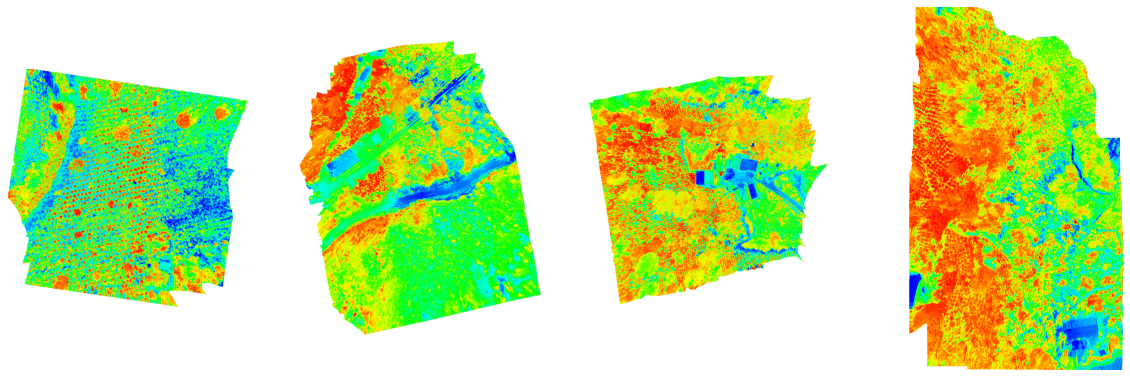

In [ ]:
# Ruta del directorio que contiene las imágenes de los mapas NDVI
directory_image = '/content/drive/MyDrive/monitoria/NDVI/Mapas NDVI'
files = glob.glob(os.path.join(directory_image, "*.jpg"))

plt.figure(figsize=(20.0,8.0))
plt.subplot(141), plt.imshow(io.imread(files[0])), plt.axis('off')
plt.subplot(142), plt.imshow(io.imread(files[1])), plt.axis('off')
plt.subplot(143), plt.imshow(io.imread(files[2])), plt.axis('off')
plt.subplot(144), plt.imshow(io.imread(files[3])), plt.axis('off')
plt.show()

plt.figure(figsize=(20.0,8.0))
plt.subplot(141), plt.imshow(io.imread(files[4])), plt.axis('off')
plt.subplot(142), plt.imshow(io.imread(files[5])), plt.axis('off')
plt.subplot(143), plt.imshow(io.imread(files[6])), plt.axis('off')
plt.subplot(144), plt.imshow(io.imread(files[7])), plt.axis('off')

plt.show()

Corte de los mapas NDVI en imágenes de tamaño 800px por 800px procurando la menor cantidad de pixeles perdidos

In [ ]:
# Ruta del directorio que contiene las imágenes de los mapas NDVI
directory_image = '/content/drive/MyDrive/monitoria/NDVI/Mapas NDVI'
# Ruta del directorio destino para las imágenes recortadas
directory_cutted = '/content/drive/MyDrive/monitoria/NDVI/NVDI_cutted' 

# Ancho y alto de las imágenes a recortar
width = 800 
height = 800

a = 2
image_list = []
image_list_c =[]

# Semilla para la obtención de valores aleatorios
random.seed(1289)

# Crea directorio destino en caso de no existir
try:
  os.makedirs(directory_cutted)
except OSError:
  pass

# Leer cada mapa NDVI como un arreglo de numpy
image_la_mina_1 = io.imread(f"{directory_image}/LaMina1 20-03-2021.jpg")
image_la_mina_2 = io.imread(f"{directory_image}/LaMina2 20-03-2021.jpg")

image_el_arrayan_1 = io.imread(f"{directory_image}/ElArrayan 12-06-2021.jpg")
image_el_arrayan_2 = io.imread(f"{directory_image}/ElArrayan 26-06-2021.jpg")

image_loma_gorda_1 = io.imread(f"{directory_image}/LomaGorda1 20-03-2021.jpg")
image_loma_gorda_2 = io.imread(f"{directory_image}/LomaGorda2 20-03-2021.jpg")

image_piloto_1 = io.imread(f"{directory_image}/Piloto1 16-02-2021.jpg")
image_piloto_2 = io.imread(f"{directory_image}/Piloto2 16-02-2021.jpg")

# |||| De forma manual se escogieron regiones que visualmente contenían
# la menor cantidad de bordes irregulares y pixeles perdidos ||||

# Agrega a una lista solo las regiones seleccionadas de cada mapa NDVI
image_list.append(image_la_mina_1[379:2289,381:2685,:])
image_list.append(image_la_mina_2[976:2756,387:3066,:])
image_list.append(image_la_mina_2[448:1248,428:2073,:])

image_list.append(image_el_arrayan_1[917:4893,1310:6428,:])
image_list.append(image_el_arrayan_2[1409:5213,552:3519,:])

image_list.append(image_loma_gorda_1[415:2449,448:2274,:])
image_list.append(image_loma_gorda_2[389:2119,622:2723,:])

image_list.append(image_piloto_1[1287:2599,372:2212,:])
image_list.append(image_piloto_1[487:1287,700:2212,:])
image_list.append(image_piloto_2[645:2442,275:2460,:])

# Imprime información general
print('Total selected regions:', len(image_list))

# Inicia el recorte

for im in image_list:
  print(f"Shape of the selected region: ({im.shape[0]},{im.shape[1]})")
  for i in range(0, im.shape[0]*a//height):
    for j in range(0, im.shape[1]*a//width):

      # Generación de números aleatorios
      rand1 = random.randint(0, im.shape[0]-height)
      rand2 = random.randint(0, im.shape[1]-width)

      # Agrega a lista la sección recortada del mapa NDVI con posición aleatoria
      #print(f"Position: {rand1}, {rand1+height} - {rand2}, {rand2+width}")
      image_list_c.append(im[rand1:rand1+height, rand2:rand2+width])

print(f"\nTotal images cropped: {len(image_list_c)}")

#Guarda las imágenes recortadas
for im in range(len(image_list_c)):
  io.imsave(f"{directory_cutted}/{im:04d}.jpg",image_list_c[im])

print('\nSaved images')

Total selected regions: 10
Shape of the selected region: (1910,2304)
Shape of the selected region: (1780,2679)
Shape of the selected region: (800,1645)
Shape of the selected region: (3976,5118)
Shape of the selected region: (3804,2967)
Shape of the selected region: (2034,1826)
Shape of the selected region: (1730,2101)
Shape of the selected region: (1312,1840)
Shape of the selected region: (800,1512)
Shape of the selected region: (1797,2185)

Total images cropped: 301
Saved images


Genera imágenes tipo máscara para cuatro rangos de valores de los colores contenidos en las imágenes recortadas de los mapas NDVI

In [ ]:
# Ruta del directorio que contiene las imágenes recortadas de los mapas NDVI
directory_cutted = '/content/drive/MyDrive/monitoria/NDVI/NVDI_cutted'
# Ruta del directorio destino para las imágenes tipo máscara generadas
directory_masked = '/content/drive/MyDrive/monitoria/NDVI/NVDI_masked'

# Crea directorio destino en caso de no existir
try:
  os.makedirs(directory_masked)
except OSError:
  pass

files = glob.glob(os.path.join(directory_cutted, "*.jpg"))
total_image = len(files)

for i in range(total_image):
  # Lee la imagen como un arreglo de numpy en el modelo de color RGB
  image = io.imread(files[i])
  # Lee la imagen como un arreglo de numpy en el modelo de color HSV
  image_hsv = cv2.cvtColor(cv2.imread(files[i]), cv2.COLOR_BGR2HSV)
  
  # Divide el contenido de la imagen en cuatro rangos uniformes según el valor de color(H)
  mask_hsv = np.zeros((4,800,800), dtype=int)
  mask_hsv[0,:,:] = cv2.inRange(image_hsv, np.array([0,50,50]), np.array([44,255,255])) # Rango alto
  mask_hsv[1,:,:] = cv2.inRange(image_hsv, np.array([45,50,50]), np.array([89,255,255])) # Rango medio
  mask_hsv[2,:,:] = cv2.inRange(image_hsv, np.array([90,50,50]), np.array([134,255,255])) # Rango bajo
  mask_hsv[3,:,:] = cv2.inRange(image_hsv, np.array([135,50,50]), np.array([179,255,255])) # Rango colores violetas

  # Define máscaras de tres dimensiones de profundidad para operar con la imagen RGB
  mask1 = np.stack((mask_hsv[0,:,:],mask_hsv[0,:,:],mask_hsv[0,:,:]), axis=2)
  mask2 = np.stack((mask_hsv[1,:,:],mask_hsv[1,:,:],mask_hsv[1,:,:]), axis=2)
  mask3 = np.stack((mask_hsv[2,:,:],mask_hsv[2,:,:],mask_hsv[2,:,:]), axis=2)
  mask4 = np.stack((mask_hsv[3,:,:],mask_hsv[3,:,:],mask_hsv[3,:,:]), axis=2)

  # Operación de máscara e imagen para obtener la información contenida en cada rango
  image_m1 = image*(mask1==255)
  image_m2 = image*(mask2==255)
  image_m3 = image*(mask3==255)
  image_m4 = image*(mask4==255)

  # Obtiene el nombre de archivo de la imagen
  filename = os.path.splitext(os.path.basename(files[i]))[0]

  # Guarda las imágenes tipo máscaras obtenidas conservando el nombre de archivo de la imagen NDVI
  io.imsave(f"{directory_masked}/{filename}_m1.jpg",image_m1)
  io.imsave(f"{directory_masked}/{filename}_m2.jpg",image_m2)
  io.imsave(f"{directory_masked}/{filename}_m3.jpg",image_m3)
  io.imsave(f"{directory_masked}/{filename}_m4.jpg",image_m4)

  # Grafica la imagen NVDI y las imágenes tipo máscaras obtenidas
  plt.figure(figsize=(20.0,20.0))
  plt.subplot(541), plt.imshow(image, vmin=0, vmax=255), plt.axis('off')
  plt.subplot(545), plt.imshow(image_m1, vmin=0, vmax=255), plt.axis('off')
  plt.subplot(5,4,6), plt.imshow(image_m2, vmin=0, vmax=255), plt.axis('off')
  plt.subplot(5,4,7), plt.imshow(image_m3, vmin=0, vmax=255), plt.axis('off')
  plt.subplot(5,4,8), plt.imshow(image_m4, vmin=0, vmax=255), plt.axis('off')
  plt.show()

print('\nSaved images')